Main purpose:

 
The main goal is to assess the performance of two hot stocks from old schooled and new schooled stocks from within technology industry through time-series effect of performance after pandemic effect of covid 19 era. After midterm project, we can see that high tech industry seem to be the growth stocks that are more preferred by most of the public compared with traditional industry, and here I choose two hotly stocks with growing passion from the public and further analyze their independent performance of return, risks level, and utilize CAPM and multifactor analysis for many aspects for deciding their sustainable development for investment in the future.

Background:
In Covid 19 era, most of countries has experienced different level of unemployment and economy recession, while the focus of more investors on technology stocks industry is not slowing down, Microsoft and Tesla as two representatives from old and new generations are widely discussed by the public, Microsoft is widely discussed people with the acquisition of blizzard and It is company that concentrate on the design of office cloud systems, and related smart digital products like laptops and tablets to increase office efficiency. While Tesla is another kind of stock that have bold steps in making a revolution in electric vehicle industry and helps to improve the life and give the public more imagination of advanced rocket and spacecraft, 
which really intrigues me a lot due to both the company’s products I have utilized before and their roles to society promotion. In this paper, I will further use python data analysis to help us understand these two stocks’ strength and weakness from their returns and risks aspects, their reasons for sustainable growth behind, and find some investment recommendations

Test design:
Our experiment is to choose two companies in high technology under the impact of covid pandemic era to test and compare each stock's performance to decide whether the effect of global recession has hindered their performance level after coronavirus’ occurrence. The steps will include displaying descriptive statistics, visualizing the results, taking different kind of hypothesis tests, constructing CAPM and multifactor models, taking single regression analysis for each stock, make a comparison of their performance between market and each other by comparing five stocks’ alpha, beta values, 4 factors within the famafrench model and finally run a Monte Carlo simulation to help us better predict possible outcomes to decide choose a better one with high performance and low risks to invest. 

Sample Selection:
Our experiment's sample selection is by choosing the time range between covid period after 2020 in each stock in order to better know its past performance, and it is a representative period that can thus help us evaluate the stock's performance 
 

In [1]:
!pip install pandas-datareader
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as sst
import statsmodels.api as sm

 Economic significance in addition to statistical significance. 

Citation: https://www.cnbc.com/2021/11/15/tesla-nvidia-and-microsoft-are-way-ahead-of-themselves-trader.html

Descriptive statistics Part

The main goal is to assess the performance of two hot stocks within technology industry through time-series effect of performance after pandemic effect of covid 19 era. After midterm project, we can see that high tech industry seem to be growth stocks that are more preferred by most of the public, and here I choose two hotly stocks with growing passion from the public and further analyze their independent performance of return, risks level, and utilize CAPM and multifactor analysis for many aspects for deciding their sustainable development for the future

In [48]:
tickers=['MSFT','TSLA']
sec_data=pd.DataFrame()
for t in tickers:
    sec_data[t]=pdr.DataReader(t,data_source='yahoo',start='2020-1-1')['Adj Close']

In [3]:
sec_returns=(sec_data/sec_data.shift(1)-1)*100
sec_returns.head()

,MSFT,TSLA
Date,,
2020-01-02,NaN,NaN
2020-01-03,-1.245194,2.963326
2020-01-06,0.258490,1.925464
2020-01-07,-0.911786,3.880052
2020-01-08,1.592870,4.920483


Descriptive Statistics(Daily)

In [4]:
sec_returns.skew()

MSFT   -0.048159
TSLA    0.084814
dtype: float64

In [5]:
sec_returns.kurtosis()

MSFT    7.173324
TSLA    3.002023
dtype: float64

In [6]:
sec_returns.mean()

MSFT    0.084194
TSLA    0.433197
dtype: float64

In [7]:
sec_returns.std()
#daily standard deviation in percentage

MSFT    2.157477
TSLA    4.554562
dtype: float64

In [49]:
a=(sec_returns.mean()*250-all['RF'].mean())/(sec_returns.std()*250**(1/2))

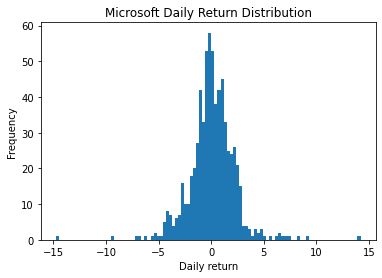

In [50]:
H1=sec_returns['MSFT']
H1=H1.dropna()
plt.hist(H1,bins=100)
plt.title('Microsoft Daily Return Distribution')  
plt.xlabel('Daily return')
plt.ylabel('Frequency')
plt.show()

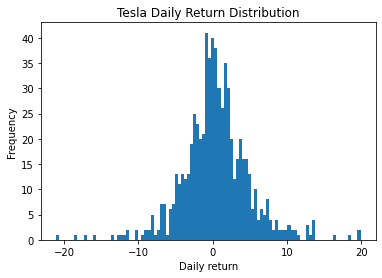

In [51]:
H2=sec_returns['TSLA']
H2=H2.dropna()
plt.hist(H2,bins=100)
plt.title('Tesla Daily Return Distribution')  
plt.xlabel('Daily return')
plt.ylabel('Frequency')
plt.show()

By looking at these two stocks descriptive statistics indicators and graphs visualization, it is clear to see that these stocks do not follow an approximate symmetrical normal distribution with a skewness not equal exactly to zero suggesting that they all have heavier or thinner tails than a normal distribution, and a higher kurtosis greater than three with peaked value located in the tails of the distribution rather than around the mean

To be specific, Microsoft has a negative skewness while tesla has the positive one. With a negative skewness of Microsoft, it will incur a few small gains and few chance of large loss. For Tesla, it is likely that with a larger positive skewness, it has the tail on the right side of the distribution is longer and much likely to get a large extreme return value.

With their separate daily average return and daily standard deviation level, it is easier for us to see than Tesla has the higher return with and at the same time it has the highest risk level, which may consider as the characteristic of growth stock, and it is the one that more worse invested with its highest sharpe ratio of 1.74, has an overall better performance within pandemic period with better its risk-adjusted performance

# Hypothesis testing 

In this part, we want to specifically find out their return comparison deeper by following an assumption of our belief and make a hypothesis testing to mostly support our thinking. We further investigate the return behind by formualating several assumptions to take hypothesis testing procedure, beginning with testing whether the daily return is zero, and two sample independent, two sample paired test as well as spearman and pearson rank correlation test, and two sample F test for equal variance for return and risk level

One sample t test for testing the zero daily return

In [52]:
sec_returns=sec_returns.dropna()

In [53]:
sst.ttest_1samp(a=sec_returns['MSFT'],popmean=0)

Ttest_1sampResult(statistic=1.0228520317698615, pvalue=0.3067383716031175)

In [54]:
sst.ttest_1samp(a=sec_returns['TSLA'],popmean=0)

Ttest_1sampResult(statistic=2.492969454348597, pvalue=0.012902649900395519)

Under 95% significance level, the one sample mean of t test shows that we cannot reject that microsoft's daily return is 0, while we are 95% confident that tesla's return is not zero

From the one sample t test, we can see that tesla has more potential of getting a daily return not equal to zero

In [55]:
#Two sample independent
sst.ttest_ind(a=sec_returns['MSFT'],b=sec_returns['TSLA'],equal_var=False)

Ttest_indResult(statistic=-1.8151029486650172, pvalue=0.06981394355615377)

Under 95% significance level, the two sample independent test shows that we cannot reject that two stocks' return performance is equal

In [56]:
#paired test assumption: two are dependent on each other
sst.ttest_rel(a=sec_returns['MSFT'],b=sec_returns['TSLA'])

Ttest_relResult(statistic=-2.3432561286632465, pvalue=0.019400954146438925)

Under 95% significance level, the paired t test shows that we are confident that the return of these two stocks is not dependent on each other

In [57]:
#Spearman Rank correlation coefficient (non parametric)
sst.spearmanr(sec_returns)


SpearmanrResult(correlation=0.49761275075725614, pvalue=2.91881609176204e-44)

In [58]:
sst.pearsonr(sec_returns['MSFT'],sec_returns['TSLA'])

(0.5169300537561535, 3.3336670799941674e-48)

By both the spearman and pearson correlation test, we can ensure that there are some part of the two stocks has some monotonic and linear relationship for the performance trend within the testing period

In [59]:
F_stat=max(sec_returns['MSFT'].var()/sec_returns['TSLA'].var(),sec_returns['TSLA'].var()/sec_returns['MSFT'].var())

In [60]:
p_value=sst.f.sf(0.95,dfn=sec_returns['MSFT'].count()-1,dfd=sec_returns['TSLA'].count()-1)
p_value

0.7490315296185563

We are 95% confident that those two stocks' volatility are strongly related to each other under pandemic period

# Hypothesis tests’ findings interpretations:

For the result of period, we can assure that Tesla and Microsoft have some types of similarities and has some part of association with their volatility level and return performance due to pressure of pandemic effect. However, from the results performance, we can be likely to see that Tesla may have an overall stronger performance due to the 5% significance level test.  

# Mid-Conclusion

From the initial descriptive statistics and hypothesis tests’ analysis, we get a preliminary overview of Tesla stock with a fast growth opportunity reflected by its strong return performance together with its volatility level, which is suitable for investors that have a great potential insights for viewing its continual growth in the future, while Microsoft is a company that displays a stable development during covid 19 crisis. 

# Import famafrench dataframe for comparing important index

Next, we incorporate both single factor of CAPM model and fama french four factor analysis to help us specify the risk level and abnormal return with the market

In [9]:
from pandas_datareader.famafrench import get_available_datasets

In [10]:
get_available_datasets

<function pandas_datareader.famafrench.get_available_datasets(**kwargs)>

In [11]:
ff=pdr.DataReader('F-F_Research_Data_Factors_daily','famafrench',start='2020-1-1')[0]

In [12]:
list(ff.columns.values)

['Mkt-RF', 'SMB', 'HML', 'RF']

In [13]:
mm=pdr.DataReader('F-F_Momentum_Factor_daily','famafrench',start='2020-1-1')[0]
list(mm.columns.values)
mm.columns=['Mom']

In [15]:
mm.head()

,Mom
Date,
2020-01-02,0.82
2020-01-03,0.03
2020-01-06,-0.69
2020-01-07,0.01
2020-01-08,0.92


In [18]:
factors=pd.merge(ff,mm,left_index=True,right_index=True)

In [19]:
factors.head()

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2020-01-02,0.86,-0.88,-0.33,0.006,0.82
2020-01-03,-0.67,0.38,0.01,0.006,0.03
2020-01-06,0.36,-0.07,-0.55,0.006,-0.69
2020-01-07,-0.19,-0.01,-0.25,0.006,0.01
2020-01-08,0.47,-0.06,-0.64,0.006,0.92


In [20]:
all=pd.merge(sec_returns,factors,left_index=True, right_index=True)

In [21]:
all=all.dropna(axis=0,how='any')

In [22]:
all.head()

,MSFT,TSLA,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,,,
2020-01-03,-1.245194,2.963326,-0.67,0.38,0.01,0.006,0.03
2020-01-06,0.258490,1.925464,0.36,-0.07,-0.55,0.006,-0.69
2020-01-07,-0.911786,3.880052,-0.19,-0.01,-0.25,0.006,0.01
2020-01-08,1.592870,4.920483,0.47,-0.06,-0.64,0.006,0.92
2020-01-09,1.249278,-2.194501,0.65,-0.64,-0.49,0.006,0.73


In [23]:
all['MSFT-RF']=all['MSFT']-all['RF']
x=all['Mkt-RF']
x1=sm.add_constant(x)
reg_MSFT_CAPM=sm.OLS(all['MSFT-RF'],x1).fit()

In [24]:
reg_MSFT_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-RF   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1678.
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          9.01e-182
Time:                        21:48:41   Log-Likelihood:                -1009.9
No. Observations:                 648   AIC:                             2024.
Df Residuals:                     646   BIC:                             2033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0530      0.045      1.170      0.242      -0.036       0.142
Mkt-RF         1.1198      0.027     40.968      0.000       1.066       1.173
==============================================================================
Omnibus:                       43.861   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.532
Skew:                           0.407   Prob(JB):                     1.33e-20
Kurtosis:                       4.652   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By having a regression on Microsoft for one regression of CAPM Model during the period, when looking at the coefficient of market risk premium, Microsoft has the number of 1.1033 significant at 95% level, an abnormal daily return of 0.0637% not significant at 95% level, and R squared number of 0.708, which suggests that Microsoft has a higher volatility level than whole systematic risk of market. A unit of increase in beta coefficient from Microsoft will bring to the 1.1033% increase in expected return. It is likely to suffer from market volatility also, while performs not exactly well than market with a positive alpha following, and have a 70.8% systemic risk suggesting high market risk with more proportion following with market change.

In [25]:
all['TSLA-RF']=all['TSLA']-all['RF']
reg_TSLA_CAPM=sm.OLS(all['TSLA-RF'],x1).fit()

In [26]:
reg_TSLA_CAPM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSLA-RF   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     278.2
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           3.26e-52
Time:                        21:48:46   Log-Likelihood:                -1798.1
No. Observations:                 648   AIC:                             3600.
Df Residuals:                     646   BIC:                             3609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3860      0.153      2.527      0.012       0.086       0.686
Mkt-RF         1.5386      0.092     16.680      0.000       1.357       1.720
==============================================================================
Omnibus:                       69.382   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.198
Skew:                           0.252   Prob(JB):                     1.86e-85
Kurtosis:                       6.768   Cond. No.                         1.66
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Similarly, By having a regression on Tesla for one regression of CAPM Model during the period, when looking at the coefficient of market risk premium, Tesla has the number of 1.4357 significant at 95% level, an abnormal daily return of 0.4516%, and R squared number of 0.251. A unit of increase in beta coefficient from Tesla will bring to the 1.4357% increase in expected daily return. Tesla has a higher volatility level than systematic risk of market, while performs well than market with a positive alpha, and have a low market risk with 25.1% due to systematic risk that has relative less proportion following with market change.

In [27]:
x2=all[['Mkt-RF','SMB','HML','Mom']]
x3=sm.add_constant(x2)
reg_TSLA_multifactor=sm.OLS(all['TSLA-RF'],x3).fit()
reg_TSLA_multifactor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                TSLA-RF   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 25 Sep 2022   Prob (F-statistic):           4.36e-67
Time:                        21:48:49   Log-Likelihood:                -1755.3
No. Observations:                 648   AIC:                             3521.
Df Residuals:                     643   BIC:                             3543.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3875      0.143      2.704      0.007       0.106       0.669
Mkt-RF         1.4854      0.088     16.786      0.000       1.312       1.659
SMB            0.9004      0.175      5.154      0.000       0.557       1.244
HML           -0.6947      0.112     -6.182      0.000      -0.915      -0.474
Mom            0.2442      0.100      2.450      0.015       0.048       0.440
==============================================================================
Omnibus:                       64.722   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.206
Skew:                           0.190   Prob(JB):                     1.35e-79
Kurtosis:                       6.648   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
reg_MSFT_multifactor=sm.OLS(all['MSFT-RF'],x3).fit()

reg_MSFT_multifactor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MSFT-RF   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     774.8
Date:                Sun, 25 Sep 2022   Prob (F-statistic):          3.24e-244
Time:                        21:48:52   Log-Likelihood:                -854.13
No. Observations:                 648   AIC:                             1718.
Df Residuals:                     643   BIC:                             1741.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0595      0.036      1.667      0.096      -0.011       0.130
Mkt-RF         1.1695      0.022     53.095      0.000       1.126       1.213
SMB           -0.4137      0.043     -9.512      0.000      -0.499      -0.328
HML           -0.3905      0.028    -13.962      0.000      -0.445      -0.336
Mom            0.0715      0.025      2.884      0.004       0.023       0.120
==============================================================================
Omnibus:                      127.503   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              508.458
Skew:                           0.853   Prob(JB):                    3.89e-111
Kurtosis:                       6.990   Cond. No.                         2.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multiple Regression Assumption check

In [29]:
err1=reg_MSFT_multifactor.resid
err1

Date
2020-01-03   -0.368109
2020-01-06   -0.422365
2020-01-07   -0.857513
2020-01-08    0.637163
2020-01-09   -0.084709
                ...   
2022-07-25   -0.399351
2022-07-26   -0.913984
2022-07-27    3.272287
2022-07-28    1.102238
2022-07-29   -0.368102
Length: 648, dtype: float64

In [30]:
err2=reg_TSLA_multifactor.resid
err2

Date
2020-01-03    3.222493
2020-01-06    0.846615
2020-01-07    3.601648
2020-01-08    3.213587
2020-01-09   -3.495921
                ...   
2022-07-25   -1.024149
2022-07-26   -1.904916
2022-07-27    0.842712
2022-07-28   -0.589065
2022-07-29    4.548682
Length: 648, dtype: float64

Durbin-Watson serial correlation test
(range between 0-4)

In [31]:
sm.stats.stattools.durbin_watson(err1)

2.090358520307358

In [32]:
sm.stats.stattools.durbin_watson(err2)


2.0340977793227633

Since the test statistics is close to 2, we cannot reject the null hypothesis that there is no serial correlation in the residual

In [33]:
#Breusch Pagan Heteroskedasticity

#Null hypothesis: Error variances are all equal
sm.stats.diagnostic.het_breuschpagan(err1,x3)


(5.63290633750311, 0.22829156633005276, 1.4096140706568867, 0.2291615454907195)

In [34]:
sm.stats.diagnostic.het_breuschpagan(err2,x3)

(8.327786234850253,
 0.0802826021390613,
 2.0927775326875016,
 0.08021103286257227)

For both Microsoft and Tesla, Since p value for both lagrage multiplier and f test is larger than 5%, we cannot reject the null hypothesis that there is no Heteroskedasticity in the data

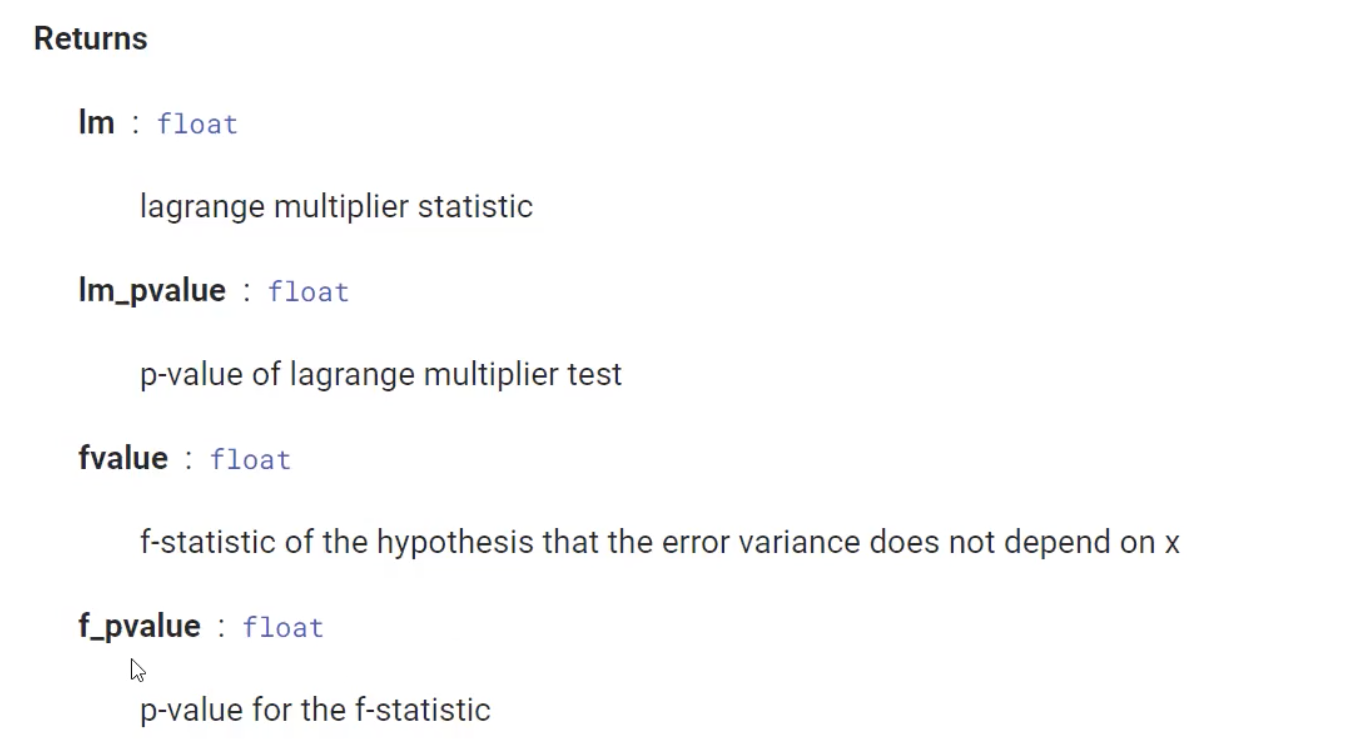

Check of Multicollinearity Problem

In [35]:
x3.corr()

,const,Mkt-RF,SMB,HML,Mom
const,NaN,NaN,NaN,NaN,NaN
Mkt-RF,NaN,1.000000,0.185700,0.009157,-0.111054
SMB,NaN,0.185700,1.000000,0.034079,-0.131237
HML,NaN,0.009157,0.034079,1.000000,-0.419378
Mom,NaN,-0.111054,-0.131237,-0.419378,1.000000


Check of multicollinearity problem, Since the correlation between each factor has a relative small absolute value, therefore there is no indication of perfect multicollinearity problem

In [36]:
sec_beta=pd.DataFrame(np.nan,index=tickers,columns=['const','Mkt-RF','SMB','HML','Mom'])
sec_beta

,const,Mkt-RF,SMB,HML,Mom
MSFT,NaN,NaN,NaN,NaN,NaN
TSLA,NaN,NaN,NaN,NaN,NaN


In [37]:
for t in tickers:
    x=all[['Mkt-RF','SMB','HML','Mom']]
    x1=sm.add_constant(x)
    y=all[t]-all['RF']
    reg=sm.OLS(y,x1).fit()
    sec_beta.loc[t,:]=reg.params
sec_beta

,const,Mkt-RF,SMB,HML,Mom
MSFT,0.059452,1.169516,-0.413691,-0.390525,0.071549
TSLA,0.387523,1.485425,0.900437,-0.694700,0.244176


Factor analysis is a strategy that find attributes that are associated with higher returns. There are two main types of factors, macroeconomic factors, and style factors. For this part, we will emphasize on utilizing fama french four style factors to give us a broader picture of two stocks factors that have associations with their return performance. We estimate the size of firms, book-to-market values, excess return on the market, and momentum.

Small Minus Big (SMB) is a size effect based on the market capitalization of a company. SMB measures the excess return of small-cap companies over big-cap companies and it is a factor in the Fama French stock pricing model that says whether smaller companies outperform larger ones over the long-term. When small stocks have good performance than large stocks, the number will be positive from excess return, vice versa.

High Minus Low (HML) is a value premium; it represents the spread in returns between companies with a high book-to-market value ratio and companies with a low book-to-market value ratio.

Momentum (Mom) is when stocks that have outperformed in the past tend to exhibit strong returns going forward. It follows the idea that stocks that have recently risen or fallen in price will continue that trend over the term. 

Four factor Analysis Results:

From the initial conditions of multi regression condition check with four factors analysis, we can see the result a little bit different from only including one factors of market risk premium. By estimating past return during the period of covid, both of them has the constant coefficient greater than 0 and it is way of measuring risk adjusted performance (Tesla has 0.452% abnormal return over the market per day, Microsoft has 0.063% not significant per day), indicating that they performs not at an equal performance level well over the market. For the coefficient of risk premium, they display a high volatility than market which makes sense due to a higher return and it displays a higher accuracy when we have incorporated more factors. Microsoft increase the expected return by 1.1888% change with 1 unit change in the market risk premium, while tesla’s return will increase by 1.4389% in a daily basis. We have a more accurate approximation of beta relative to market compared by incorporating more variables compared with one factor in CAPM model, and it also suggests that tesla has a higher magnitude of volatility relative to market. Microsoft's small minus big factor is negative, showing it is a stock with large market capitalization, while tesla is a stock with relatively small size of capitalization. In high minus low coefficients, both of these two companies show the excess return is from the company’s small book-to-market equity value, both stocks behave more like one of growth stock. In momentum coefficients, Tesla displays a stronger trend the rate of change in price movement over a period of time during the period but may follows the risk level trend mentioned in previous session. 

When we have more factors, we have a more accurate approximation of beta relative to market

Intepretation: https://www.investopedia.com/terms/f/factor-investing.asp

# Daily Return Monte Carlo simulation

For this part, I will use monte carlo simulation, a common method for generating all possible path of result from both Microsoft and tesla past performance to have a rough comparison for their different possible realizations of future performance.

In [38]:
sec_returns.mean()

MSFT    0.084194
TSLA    0.433197
dtype: float64

In [39]:
sec_returns.std()

MSFT    2.157477
TSLA    4.554562
dtype: float64

In [40]:
rev_m_MSFT=sec_returns.mean()['MSFT']
rev_stdev_MSFT=sec_returns.std()['MSFT']
iterations=1000
rev_MSFT=np.random.normal(rev_m_MSFT,rev_stdev_MSFT,iterations) 

In [41]:
rev_MSFT.mean()

0.04155286246859647

In [42]:
rev_MSFT.std()

2.151445430897112

In [43]:
rev_m_TSLA=sec_returns.mean()['TSLA']
rev_stdev_TSLA=sec_returns.std()['TSLA']
iterations=1000
rev_TSLA=np.random.normal(rev_m_TSLA,rev_stdev_TSLA,iterations) 

In [44]:
rev_TSLA.mean()

0.5407975237192951

In [45]:
rev_TSLA.std()

4.616191626895258

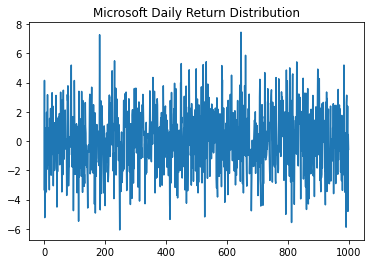

In [46]:
plt.plot(rev_MSFT)
plt.title('Microsoft Daily Return Distribution')  
plt.show()

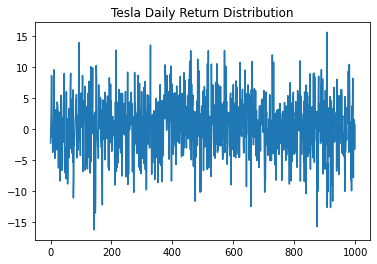

In [47]:
plt.plot(rev_TSLA)
plt.title('Tesla Daily Return Distribution')  
plt.show()

# Conclusions and Related Investment Recommendations

After the descriptive statistics, data visualization, hypothesis tests, FamaFrench one factor analysis using CAPM model & four factor models, and finally Monte Carlo simulations for us to approximate all possible outcomes pathway, we can easily shows that tesla, as a new group of generation of technology, have a relatively fast speed of growing in the pandemic period, but the following it may brought is the overall higher individual risk level and stock price volatility with the characteristic of growth stocks and small capitalization suffered when invested. Microsoft is a stock that more likely perform stable and likely to suffer with market risk with its greater proportion of R squared number, and less likely to get abnormal returns over the market performance. 
Both stocks are considered good choices and will likely to have sustainable growth after viewing their separate performances during covid period. For the investment strategy between these two stocks, it really depends on the type of investors, if you are investors that have special insights about new growth tech companies with relatively small capitalization current and fast growth momentum, it is suitable to choose Tesla, and other stable investors, Microsoft will be an alternative choices for old school growth technology stocks.    

However, we should be especially careful about the tesla stock since it is fast growth stock based on investor’s passion and high expectation, while tesla is not really the kind of representative new school technology growth stocks with currently no true competitors in electric vehicle area, investor should be careful about the ultimate investment about concerning the potential growth after pandemic period. 
